<a href="https://colab.research.google.com/github/ctrivino1/DroneAudioDataset/blob/master/Drone_Audio_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Note: try and edit for low frequency and high frequency signals for each image and see if you can try and extract that info.

In [ ]:
!git clone https://github.com/ctrivino1/DroneAudioDataset

Cloning into 'DroneAudioDataset'...
remote: Enumerating objects: 10655, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 10655 (delta 6), reused 9 (delta 6), pack-reused 10643
Receiving objects: 100% (10655/10655), 274.57 MiB | 29.31 MiB/s, done.
Resolving deltas: 100% (182/182), done.
Checking out files: 100% (23409/23409), done.


In [ ]:
# Get the critical imports out of the way
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import librosa.display
import soundfile
import os
# matplotlib complains about the behaviour of librosa.display, so we'll ignore those warnings:
import warnings; warnings.filterwarnings('ignore')
from IPython.core.display import HTML 
# Center matplotlib figures...
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# Lets look at a random sampel from each of our sound classes:

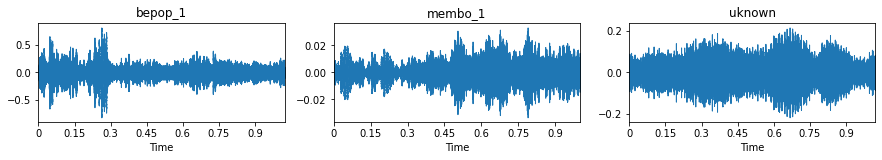

In [ ]:


################# different samples of sounds from each data set #####################################
with soundfile.SoundFile('/content/DroneAudioDataset/Multiclass_Drone_Audio/bebop_1/bebop_ (1).wav') as audio:
    waveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate
    plt.figure(figsize=(15,4))
    plt.subplot(2, 3, 1)
    librosa.display.waveplot(waveform, sr=sample_rate)
    plt.title('bepop_1')

with soundfile.SoundFile('/content/DroneAudioDataset/Multiclass_Drone_Audio/membo_1/membo_ (1).wav') as audio:
    waveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate
    plt.subplot(2, 3, 2)
    librosa.display.waveplot(waveform, sr=sample_rate)
    plt.title('membo_1')

with soundfile.SoundFile('/content/DroneAudioDataset/Multiclass_Drone_Audio/unknown/unknown_ (100).wav') as audio:
    waveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate
    plt.subplot(2, 3, 3)
    librosa.display.waveplot(waveform, sr=sample_rate)
    plt.title('uknown')




We can see from these different samples that there are some differences but I would like to create more features that an A.N.N could train on. Hence from here on I will create features that will be used to train our final model

# Short-Time Fourier Transform

In [ ]:
with soundfile.SoundFile('/content/DroneAudioDataset/Multiclass_Drone_Audio/bebop_1/bebop_ (1).wav') as audio:
    bebop_1_waveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate

with soundfile.SoundFile('/content/DroneAudioDataset/Multiclass_Drone_Audio/membo_1/membo_ (1).wav') as audio:
    membo_1_waveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate


with soundfile.SoundFile('/content/DroneAudioDataset/Multiclass_Drone_Audio/unknown/unknown_ (100).wav') as audio:
    Unknown_waveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate

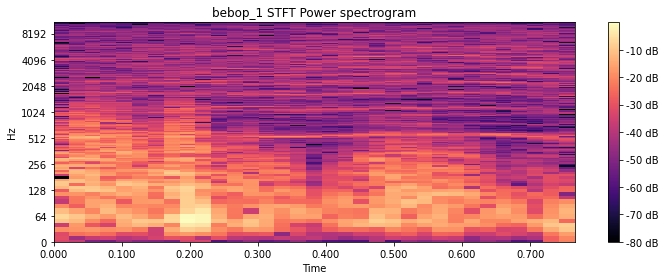

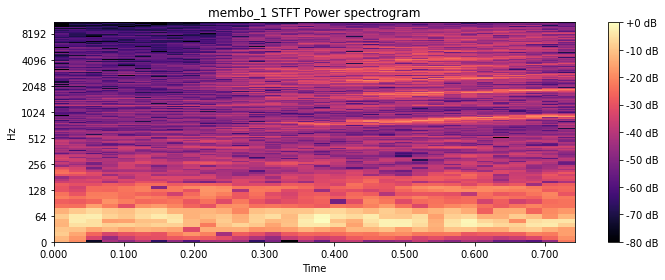

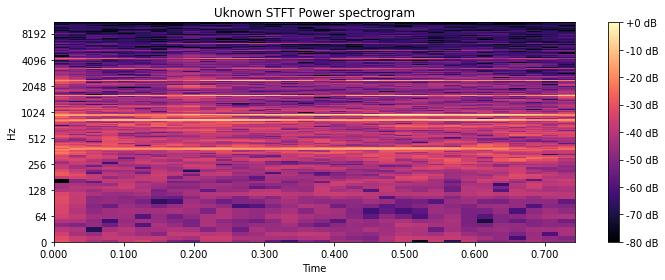

In [ ]:
# Visualize the combination of power spectrograms output by STFT w.r.t time

stft_spectrum_matrix = librosa.stft(bebop_1_waveform)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(stft_spectrum_matrix), ref=np.max),y_axis='log', x_axis='time')
plt.title('bebop_1 STFT Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

stft_spectrum_matrix = librosa.stft(membo_1_waveform)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(stft_spectrum_matrix), ref=np.max),y_axis='log', x_axis='time')
plt.title('membo_1 STFT Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

stft_spectrum_matrix = librosa.stft(Unknown_waveform)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(stft_spectrum_matrix), ref=np.max),y_axis='log', x_axis='time')
plt.title('Uknown STFT Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

Note: I am operating under the assumption that features whose interclass differences we can visualize will be good candidates on which to train a neural network

# Mel-Frequency Cepstral Coefficients

##### We're going to build on the STFT by using the Mel Frequency Cepstral Coefficients (MFCCs) as a feature. In brief, MFCC is a mathematical method which transforms the power spectrum of an audio signal to a small number of coefficients representing power of the audio signal in a frequency region (a region of pitch) taken w.r.t. time.

In other words, MFC coefficients give us an idea of the changing pitch of an audio signal.

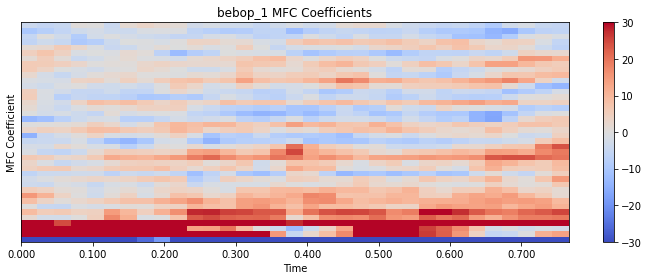

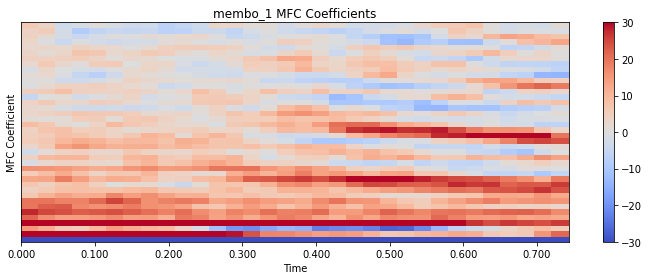

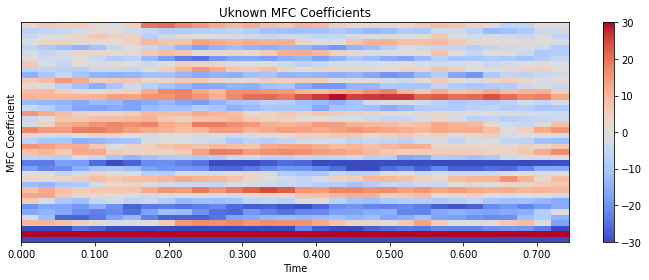

In [ ]:
## visualize our samples MFC coefficients w.r.t time

from matplotlib.colors import Normalize
mfc_coefficients = librosa.feature.mfcc(y=bebop_1_waveform, sr=sample_rate, n_mfcc=40)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfc_coefficients, x_axis='time',norm=Normalize(vmin=-30,vmax=30))
plt.colorbar()
plt.yticks(())
plt.ylabel('MFC Coefficient')
plt.title('bebop_1 MFC Coefficients')
plt.tight_layout()
                                        
mfc_coefficients = librosa.feature.mfcc(y=membo_1_waveform, sr=sample_rate, n_mfcc=40)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfc_coefficients, x_axis='time',norm=Normalize(vmin=-30,vmax=30))
plt.colorbar()
plt.yticks(())
plt.ylabel('MFC Coefficient')
plt.title('membo_1 MFC Coefficients')
plt.tight_layout()

mfc_coefficients = librosa.feature.mfcc(y=Unknown_waveform, sr=sample_rate, n_mfcc=40)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfc_coefficients, x_axis='time',norm=Normalize(vmin=-30,vmax=30))
plt.colorbar()
plt.yticks(())
plt.ylabel('MFC Coefficient')
plt.title('Uknown MFC Coefficients')
plt.tight_layout()



**Positive MFCCs correspond to low-frequency regions of the cepstrum, and negative MFFCs to high-frequency.**

**In these samples we can see that the membo and bebop class both are correlated with higher MFFC proportion**

# Mel Spectrograms and Mel-Frequency Cepstrums

#### Mel Spectrograms and Mel-Frequency Cepstrums

#### In deriving our MFCCs, we have also produced an additional feature we can make use of. When we mapped the frequencies of a power spectrogram to the mel scale, we produced a Mel Frequency Spectrogram - a simple analog of the power spectrogram with the frequency scale in mels. We're going to use the Mel Specotrgrogram as a feature of its own.

Visualize our sample's Mel spectrogram w.r.t time:

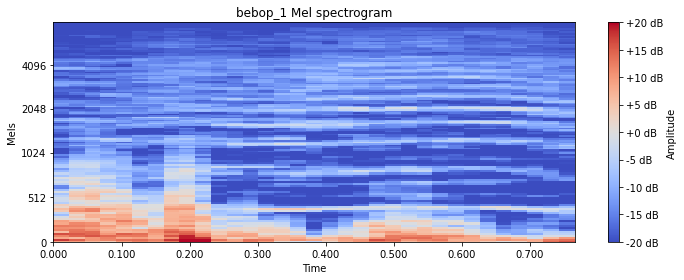

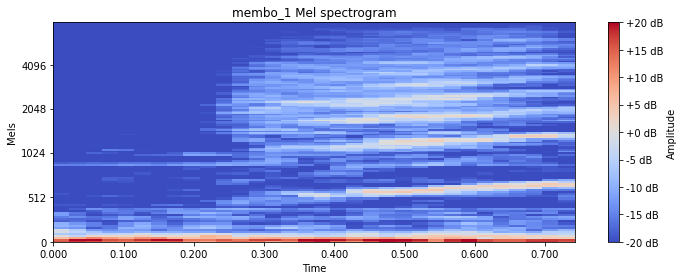

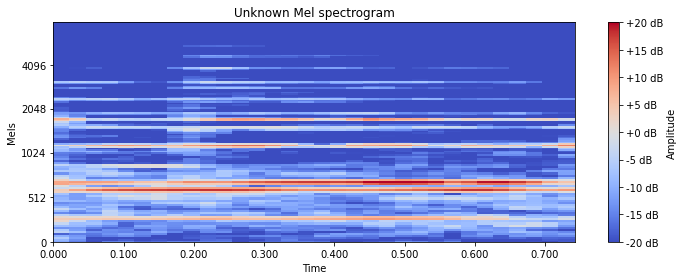

In [ ]:
melspectrogram = librosa.feature.melspectrogram(y=bebop_1_waveform, sr=sample_rate, n_mels=128, fmax=8000)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S=melspectrogram, ref=np.mean),y_axis='mel',fmax=8000, x_axis='time', norm=Normalize(vmin=-20,vmax=20))
plt.colorbar(format='%+2.0f dB',label='Amplitude')
plt.ylabel('Mels')
plt.title('bebop_1 Mel spectrogram')
plt.tight_layout()

melspectrogram = librosa.feature.melspectrogram(y=membo_1_waveform, sr=sample_rate, n_mels=128, fmax=8000)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S=melspectrogram, ref=np.mean),y_axis='mel',fmax=8000, x_axis='time', norm=Normalize(vmin=-20,vmax=20))
plt.colorbar(format='%+2.0f dB',label='Amplitude')
plt.ylabel('Mels')
plt.title('membo_1 Mel spectrogram')
plt.tight_layout()

melspectrogram = librosa.feature.melspectrogram(y=Unknown_waveform, sr=sample_rate, n_mels=128, fmax=8000)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S=melspectrogram, ref=np.mean),y_axis='mel',fmax=8000, x_axis='time', norm=Normalize(vmin=-20,vmax=20))
plt.colorbar(format='%+2.0f dB',label='Amplitude')
plt.ylabel('Mels')
plt.title('Unknown Mel spectrogram')
plt.tight_layout()

**From these visualizations we see the different classes pitch transitions. This seems like it may be a useful feature in training a model** (Get Chiltons help for interpretation)

# The Chromagram

#### To extract an additional feature, we're going to build a chromagram on each power spectrogram computed by STFT. A chromagram is a representation of an audio signal w.r.t. time, mapping audio signal to a pitch class. Most often, we map to the 12 standard pitch classes (i.e. the musical scale CDEFGAB + 5 semitones gives us 12 pitch classes). Again, wikipedia has a short and sweet explanation. 

Visualize the Chromogram four our sample audio:

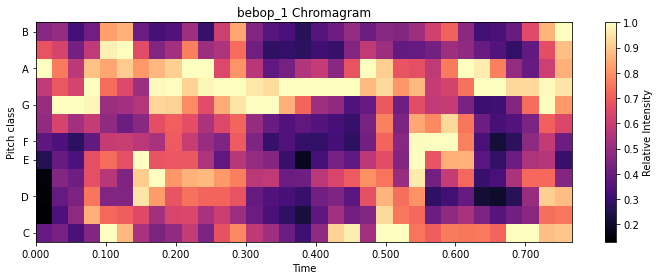

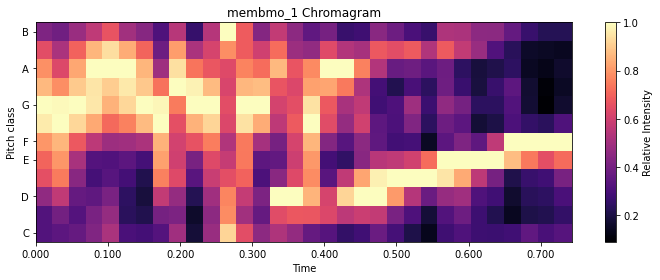

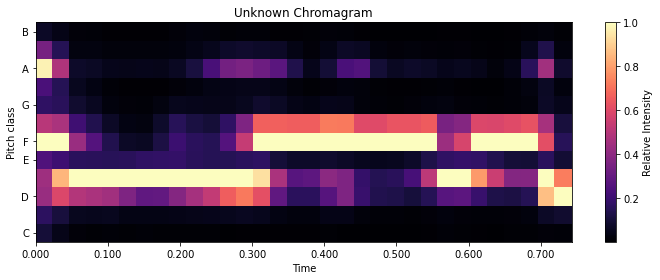

In [ ]:
chromagram = librosa.feature.chroma_stft(y=bebop_1_waveform, sr=sample_rate)
plt.figure(figsize=(10, 4))
librosa.display.specshow(chromagram, y_axis='chroma', x_axis='time')
plt.colorbar(label='Relative Intensity')
plt.title('bebop_1 Chromagram')
plt.tight_layout()

chromagram = librosa.feature.chroma_stft(y=membo_1_waveform, sr=sample_rate)
plt.figure(figsize=(10, 4))
librosa.display.specshow(chromagram, y_axis='chroma', x_axis='time')
plt.colorbar(label='Relative Intensity')
plt.title('membmo_1 Chromagram')
plt.tight_layout()

chromagram = librosa.feature.chroma_stft(y=Unknown_waveform, sr=sample_rate)
plt.figure(figsize=(10, 4))
librosa.display.specshow(chromagram, y_axis='chroma', x_axis='time')
plt.colorbar(label='Relative Intensity')
plt.title('Unknown Chromagram')
plt.tight_layout()

**Here we can look at the different dispersion rates of our sample from the classes, there are some interesting patterns** (get chiltons help for more interpretation)

# Feature Extraction

We're going to take full advantage of librosa, a Python library enabling audio analysis and feature extraction. Librosa abstracts away all the math and most of the details of mel spectrorgams, chromagrams, and MFCC. Although closely related, we're going to take the Mel Spectrogram, MFCC, and chromagrams of each audio file as separate features to try and have bit more discriminatory power between samples.

Let's build our feature extraction functions to get a chromagram, a mel spectorgram, and MFC coefficients for each of our audio files. Because the chromagram, mel spectrogram and MFCCs are calculated on audio frames produced by STFT, we're going to get a matrix back from each function, so we'll take the mean of those matrices to produce a single feature array for each feature and each audio sample, i.e. 3 feature arrays per audio sample.

**Chromagram**: Will produce 12 features; One for each of 12 pitch classes

**Mel Spectrogram**: Will produce 128 features; We've defined the number of mel frequency bands at n_mels=128

**MFCC:** Will produce 40 MFCCs; I've set the number of coefficients to return at n_mfcc=40 which I found to work well


In [ ]:
import librosa

def feature_chromagram(waveform, sample_rate):
    # STFT computed here explicitly; mel spectrogram and MFCC functions do this under the hood
    stft_spectrogram=np.abs(librosa.stft(waveform))
    # Produce the chromagram for all STFT frames and get the mean of each column of the resulting matrix to create a feature array
    chromagram=np.mean(librosa.feature.chroma_stft(S=stft_spectrogram, sr=sample_rate).T,axis=0)
    return chromagram

def feature_melspectrogram(waveform, sample_rate):
    # Produce the mel spectrogram for all STFT frames and get the mean of each column of the resulting matrix to create a feature array
    # Using 8khz as upper frequency bound should be enough for most speech classification tasks
    melspectrogram=np.mean(librosa.feature.melspectrogram(y=waveform, sr=sample_rate, n_mels=128, fmax=8000).T,axis=0)
    return melspectrogram

def feature_mfcc(waveform, sample_rate):
    # Compute the MFCCs for all STFT frames and get the mean of each column of the resulting matrix to create a feature array
    # 40 filterbanks = 40 coefficients
    mfc_coefficients=np.mean(librosa.feature.mfcc(y=waveform, sr=sample_rate, n_mfcc=40).T, axis=0) 
    return mfc_coefficients

We're going to wrap our feature extraction functions so we only have to load each audio file once. After extracting our 3 audio features as NumPy arrays representing a time series, we're going to stack them horizontally to create a single feature array.

In [ ]:
def get_features(file):
    # load an individual soundfile
     with soundfile.SoundFile(file) as audio:
        waveform = audio.read(dtype="float32")
        sample_rate = audio.samplerate
        # compute features of soundfile
        chromagram = feature_chromagram(waveform, sample_rate)
        melspectrogram = feature_melspectrogram(waveform, sample_rate)
        mfc_coefficients = feature_mfcc(waveform, sample_rate)

        feature_matrix=np.array([])
        # use np.hstack to stack our feature arrays horizontally to create a feature matrix
        feature_matrix = np.hstack((chromagram, melspectrogram, mfc_coefficients))
        
        return feature_matrix

In [ ]:
#Emotions in the RAVDESS dataset

classes ={
  'bebop':'bebop_1',
  'membo':'membo_1',
  'unknown':'unknown',
}

Load our data set (Need lots of help)

In [ ]:
import os, glob
## my filepath examples


def load_data():
    X,y=[],[]
    count = 0
    for file in glob.glob("/content/DroneAudioDataset/Multiclass_Drone_Audio//*//*.wav"):
        file_name=os.path.basename(file)
        clas=classes[file_name.split("_")[0]]
        features = get_features(file)
        X.append(features)
        y.append(clas)
        count += 1
        # '\r' + end='' results in printing over same line
        print('\r' + f' Processed {count}/{11704} audio samples',end=' ')
    # Return arrays to plug into sklearn's cross-validation algorithms
    return np.array(X), np.array(y)

In [ ]:
features, classes = load_data()

 Processed 11704/11704 audio samples 

In [ ]:
print(f'\nAudio samples represented: {features.shape[0]}')
print(f'Numerical features extracted per sample: {features.shape[1]}')
features_df = pd.DataFrame(features) # make it pretty for display
features_df


Audio samples represented: 11704
Numerical features extracted per sample: 180


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179
0,0.525388,0.626208,0.738453,0.723110,0.673685,0.984140,0.829546,0.719305,0.619001,0.738247,0.844516,0.609839,0.481280,1.064129,0.480706,0.095350,0.032573,0.411851,0.330998,0.044553,0.054191,0.048486,0.035184,0.495282,0.353818,0.062610,0.194016,0.601720,0.353718,0.306376,0.614908,0.419620,0.048008,0.034802,0.025299,0.025883,0.237578,3.339376,0.514755,0.078180,...,-124.012138,17.091278,-7.179029,17.957325,-9.513316,-1.268921,-9.715153,0.289292,3.824786,9.685201,5.479057,4.347790,-7.790402,-0.121619,-3.836622,7.842899,4.767856,7.620430,8.495289,10.363387,5.085915,-4.433331,-7.742227,-1.920568,-5.466779,-3.707173,0.231915,14.370975,5.904608,-0.962951,-3.285732,-0.821796,-0.981938,2.714617,6.630520,-2.035594,-7.493405,0.865872,0.410763,1.638402
1,0.732512,0.675385,0.622825,0.708401,0.623886,0.635754,0.676124,0.712071,0.893029,0.779412,0.682705,0.665455,46.209576,144.249557,115.468948,54.426331,35.016365,14.767237,8.142974,4.109626,2.373489,1.922640,1.003840,0.845845,0.529137,0.535741,0.367639,0.377116,2.023772,0.911908,0.407893,0.083616,0.075687,0.061305,0.092987,0.065574,0.039744,0.034599,0.037534,0.050506,...,-88.530151,15.041357,12.205660,46.778065,22.366922,29.307608,15.119364,17.058958,12.724911,8.645666,3.962797,3.546596,-5.648886,3.724603,1.720719,14.564011,12.102522,6.246891,-4.384806,-4.707300,1.351588,4.877851,-2.457396,-5.268852,-3.013697,5.262039,-5.157255,-3.118627,0.854057,6.831715,-0.654446,-0.554539,4.997747,0.319612,-4.318654,1.366319,1.193883,-4.158307,-6.486049,0.122006
2,0.850439,0.849794,0.845825,0.796741,0.799180,0.917688,0.861065,0.862819,0.894091,0.862674,0.920679,0.868111,14.824187,51.439724,29.980804,20.024401,17.731527,10.291927,6.089926,5.504723,6.164004,4.541276,7.649937,7.620096,6.148537,5.322590,4.912858,3.648334,4.656347,4.604942,3.966793,4.239077,3.291469,2.866966,2.537696,2.699606,3.295424,3.104914,2.283997,2.622864,...,-33.295223,74.223770,0.753248,18.619030,-0.784843,6.064789,-0.498792,4.859361,1.746296,3.598164,-1.213827,3.433907,-1.604993,5.911958,-1.863165,3.457198,-1.984644,3.432532,2.473377,1.647653,0.937919,-0.455623,-0.513817,3.606599,-1.035048,0.853128,-1.416543,3.947433,-1.166773,-0.953695,0.392295,-0.428971,-2.459838,-0.172907,-1.105629,-3.120878,-1.545582,1.665209,-2.413086,0.188916
3,0.645761,0.598989,0.610233,0.631029,0.571345,0.642395,0.781416,0.903253,0.904774,0.704540,0.603635,0.649905,0.285577,0.902563,0.145004,0.193918,0.202865,0.265723,0.012799,0.002650,0.005652,0.024829,0.069971,0.030991,0.004825,0.006835,0.409161,2.151010,5.830085,4.358148,0.564929,0.019792,0.030613,0.064750,0.085909,0.034186,0.027256,0.015298,0.026443,0.052342,...,-92.759674,-17.928818,-24.974236,8.722211,-6.340486,7.487671,-1.363501,3.597693,3.916514,4.228855,0.417653,2.485759,-3.352611,9.974587,12.956324,26.174154,20.532703,14.292702,-1.066640,-5.657478,-0.640789,2.304803,-6.526360,-9.393121,-7.961577,3.102091,-3.806988,-2.951437,-0.363104,5.976325,1.022087,1.017089,3.886106,1.564908,-0.586622,0.605873,-4.461629,-10.039459,-12.082584,-7.483099
4,0.729736,0.684204,0.668392,0.715372,0.677113,0.699628,0.745196,0.846502,0.851087,0.770005,0.656567,0.695374,12.268212,23.727230,14.909454,6.060143,3.518950,2.193106,1.142342,0.958429,0.458525,0.330386,0.338049,0.253283,0.197383,0.192163,0.539590,0.515197,1.967390,0.775650,0.297293,0.051181,0.050529,0.038642,0.033394,0.058981,0.035927,0.029060,0.031172,0.035149,...,-123.512856,27.042124,11.730003,34.407330,13.280285,21.486422,7.184233,11.164454,5.945037,4.983653,2.544320,2.273859,-4.193271,5.995445,5.528324,15.562465,7.842860,6.126267,-1.815616,-1.047721,2.055574,3.506183,-3.588076,-3.637758,-3.396437,3.676098,-4.245004,-0.709737,1.451962,4.541171,0.404591,2.608497,4.116713,1.843744,-0.512851,2.

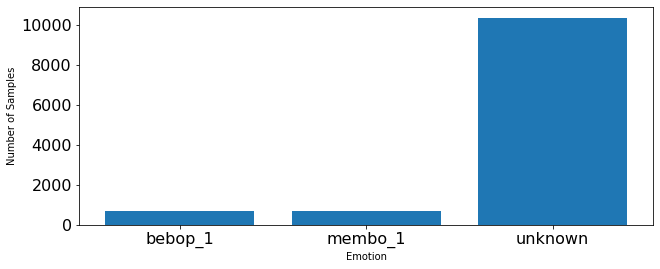

In [ ]:
# plot emotions
plt.figure(figsize=(35,4))
plt.subplot(1,3,1)
#np.unique returns ordered list of unique elements and count of each element
class_list, count = np.unique(classes, return_counts=True)
plt.bar(x=range(3), height=count)
plt.xticks(ticks=range(3), labels = [clas for clas in class_list],fontsize=10)
plt.xlabel('Emotion')
plt.tick_params(labelsize=16)
plt.ylabel('Number of Samples')
plt.show()

So there isn't alot of "bebop_1" or "membo_1" audio samples in this data set. I've been in data science long enough that I know this will have an effect upon the model. I'll have to figure what exactly I'm going to do to try and fix this (perhaps oversampling or undersampling)

#Feature scaling


Lets take a look at our features distributions, then we can decide whther to use min max scaling or standard scalart to help with some feature scaling

In [ ]:
# We would usually use df.describe(), but it provides a bit of a mess of information we don't need at the moment.
def print_features(df):
    # Check chromagram feature values
    features_df_chromagram = df.loc[:,:11]
    chroma_min = features_df_chromagram.min().min()
    chroma_max = features_df_chromagram.max().max()
    # stack all features into a single series so we don't get a mean of means or stdev of stdevs
    chroma_mean = features_df_chromagram.stack().mean()
    chroma_stdev = features_df_chromagram.stack().std()
    print(f'12 Chromagram features:       \
    min = {chroma_min:.3f}, \
    max = {chroma_max:.3f}, \
    mean = {chroma_mean:.3f}, \
    deviation = {chroma_stdev:.3f}') 

    # Check mel spectrogram feature values
    features_df_melspectrogram = df.loc[:,12:139]
    mel_min = features_df_melspectrogram.min().min()
    mel_max = features_df_melspectrogram.max().max()
    # stack all features into a single series so we don't get a mean of means or stdev of stdevs
    mel_mean = features_df_melspectrogram.stack().mean()
    mel_stdev = features_df_melspectrogram.stack().std()
    print(f'\n128 Mel Spectrogram features: \
    min = {mel_min:.3f}, \
    max = {mel_max:.3f}, \
    mean = {mel_mean:.3f}, \
    deviation = {mel_stdev:.3f}')

    # Check MFCC feature values
    features_df_mfcc = df.loc[:,140:179]
    mfcc_min = features_df_mfcc.min().min()
    mfcc_max = features_df_mfcc.max().max()
    # stack all features into a single series so we don't get a mean of means or stdev of stdevs
    mfcc_mean = features_df_mfcc.stack().mean()
    mfcc_stdev = features_df_mfcc.stack().std()
    print(f'\n40 MFCC features:             \
    min = {mfcc_min:.3f},\
    max = {mfcc_max:.3f},\
    mean = {mfcc_mean:.3f},\
    deviation = {mfcc_stdev:.3f}')
    
print_features(features_df)

12 Chromagram features:           min = 0.000,     max = 1.000,     mean = 0.613,     deviation = 0.268

128 Mel Spectrogram features:     min = 0.000,     max = 9669.961,     mean = 3.038,     deviation = 40.866

40 MFCC features:                 min = -1131.371,    max = 282.065,    mean = -6.322,    deviation = 73.063


We can see that our features have different distributions. Next I will use minmaxscalar and standard scalar to help with feature scaling

In [ ]:
## StandardScaler / minmax
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
# keep our unscaled features just in case we need to process them alternatively
features_scaled = features 
features_scaled = scaler.fit_transform(features_scaled)

scaler = MinMaxScaler()
# keep our unscaled features just in case we need to process them alternatively
features_minmax = features
features_minmax = scaler.fit_transform(features_minmax)

In [ ]:
print('\033[1m'+'Standard Scaling:\n'+'\033[0m')
features_scaled_df = pd.DataFrame(features_scaled)
print_features(features_scaled_df)

print('\n\n\033[1m'+'MinMax Scaling:\n'+'\033[0m')
features_minmax_df = pd.DataFrame(features_minmax)
print_features(features_minmax_df)

Standard Scaling:

12 Chromagram features:           min = -2.317,     max = 1.582,     mean = -0.000,     deviation = 1.000

128 Mel Spectrogram features:     min = -0.198,     max = 104.197,     mean = 0.000,     deviation = 0.996

40 MFCC features:                 min = -11.856,    max = 12.606,    mean = -0.000,    deviation = 1.000


MinMax Scaling:

12 Chromagram features:           min = 0.000,     max = 1.000,     mean = 0.613,     deviation = 0.268

128 Mel Spectrogram features:     min = 0.000,     max = 1.000,     mean = 0.003,     deviation = 0.023

40 MFCC features:                 min = 0.000,    max = 1.000,    mean = 0.456,    deviation = 0.112


So right now I"m leaning toward using standard scaling since one of our features is already between [0,1]

In [ ]:
############# Unscaled test/train set #############
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    features, 
    classes, 
    test_size=0.2, 
    random_state=69
)

############ Standard Scaled test/train set ###########
# The labels/classes (y_train, y_test) never change, keep old values 
X_train_scaled, X_test_scaled, _, _ = train_test_split(
    features_scaled, 
    classes, 
    test_size=0.2, 
    random_state=69
)

############# MinMax Scaled test/train set ###############
# The labels/classes (y_train, y_test) never change, keep old values 
X_train_minmax, X_test_minmax, _, _ = train_test_split(
    features_scaled, 
    classes, 
    test_size=0.2, 
    random_state=69
)

# ML models

Lets just compare some base models

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

classification_models = [
    KNeighborsClassifier(),#(3),
    SVC(kernel='linear'),#, C=0.025),
    SVC(kernel='rbf'),
    DecisionTreeClassifier(),#max_depth=5),
    RandomForestClassifier(),#max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    XGBClassifier(),
    GaussianNB(),
    
    QuadraticDiscriminantAnalysis()]

scores = []
for model in classification_models:
    model.fit(X_train_scaled, y_train)
    score = model.score(X_test_scaled, y_test)
    model_name = type(model).__name__
    if model_name=='SVC' and model.kernel=='rbf': model_name+=' RBF kernel'
    scores.append((model_name,(f'{100*score:.2f}%')))
# Make it pretty
scores_df = pd.DataFrame(scores,columns=['Classifier','Accuracy Score'])
scores_df.sort_values(by='Accuracy Score',axis=0,ascending=False)

,Classifier,Accuracy Score
6,XGBClassifier,98.76%
1,SVC,98.29%
0,KNeighborsClassifier,98.25%
4,RandomForestClassifier,98.08%
2,SVC RBF kernel,97.65%
3,DecisionTreeClassifier,96.88%
5,AdaBoostClassifier,95.47%
8,QuadraticDiscriminantAnalysis,70.27%
7,GaussianNB,35.37%


Looks like there are some good Results! I will now attempt to see if I can create a A.N.N. that can acheive similarly high results!